In [1]:
# Carga de librerías
import pandas as pd
import numpy as np
#import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carga del set de datos
df = pd.read_csv('train.csv')

- `id` - a unique identifier for each tweet
- `text` - the text of the tweet
- `location` - the location the tweet was sent from (may be blank)
- `keyword` - a particular keyword from the tweet (may be blank)
- `target` - in train.csv only, this denotes whether a tweet is about a real disaster (`1`) or not (`0`)

### Información general del set de datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
print('Proporción de relleno de campo "keyword":', \
      round(df['keyword'].dropna().count() / df.shape[0], 2))
print('Proporción de relleno de campo "location":', \
      round(df['location'].dropna().count() / df.shape[0], 2))

Proporción de relleno de campo "keyword": 0.99
Proporción de relleno de campo "location": 0.67


#### Muestra aleatoria del set de datos

In [5]:
df.sample(5)

,id,keyword,location,text,target
2702,3876,detonation,Bangkok Thailand,A new favorite: Trivium - Detonation by @rrusa...,0
4340,6164,hijack,"Lagos, Nigeria",{:en}Tension In Bayelsa As Patience Jonathan P...,1
4223,5998,hazardous,"British Columbia, Canada",Skinny Jeans are Hazardous for Your Health! #s...,1
4144,5891,harm,"Cleveland, OH - San Diego, CA",IMAGINE A DOCTOR TREATING AN #EBOLA PATIENT WI...,1
6714,9616,thunderstorm,Jupiter,#usNWSgov Severe Weather Statement issued Augu...,1


#### Descripción de variables estadísticas del set de datos

In [6]:
df.describe(include=[np.object, np.number]).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,7613,NaN,NaN,NaN,5441.93,3137.12,1,2734,5408,8146,10873
keyword,7552,221,fatalities,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,5080,3341,USA,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
text,7613,7503,11-Year-Old Boy Charged With Manslaughter of T...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
target,7613,NaN,NaN,NaN,0.42966,0.49506,0,0,0,1,1


In [7]:
df.loc[df['text'].str.contains('11-Year-Old Boy')]

,id,keyword,location,text,target
3578,5113,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3589,5127,fatal,Varanasi,11-Year-Old Boy Charged With Manslaughter of T...,1
3591,5130,fatal,Thane,11-Year-Old Boy Charged With Manslaughter of T...,1
3597,5137,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3600,5140,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3603,5144,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3604,5145,fatal,Bangalore,11-Year-Old Boy Charged With Manslaughter of T...,1
3610,5153,fatal,Dimapur,11-Year-Old Boy Charged With Manslaughter of T...,1
3613,5157,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3614,5159,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1


Hay mensajes que se repiten. Puede tratarse de retweets.

In [8]:
df['location'].nunique()

3341

In [9]:
df['location'].value_counts()[20:30]

San Francisco        14
United Kingdom       14
Washington, D.C.     13
Indonesia            13
Los Angeles          13
NYC                  12
Toronto              12
Ireland              12
Chicago              11
San Francisco, CA    11
Name: location, dtype: int64

In [10]:
# Se elige un ancho para la visualización de columnas
pd.set_option('max_colwidth', 150)

display(df.loc[df['location'] == 'Indonesia'])

# Se vuelve al valor por default de 'max_colwidth'
pd.reset_option('max_colwidth')

,id,keyword,location,text,target
148,212,airplane%20accident,Indonesia,#KCA #VoteJKT48ID mbataweel: #RIP #BINLADEN Family members who killed in an airplane's accident,1
882,1277,blood,Indonesia,it wasnt a very big stab but it was a deep stab and theres like blood everwhe,1
1998,2872,damage,Indonesia,'Mages of Fairy Tail.. Specialize in property damage!' - Natsu Dragneel,0
3732,5304,fear,Indonesia,The fear of the Lord is the start of knowledge: but the foolish have no use for wisdom and teaching (Amsal 1:7),0
4737,6736,lava,Indonesia,@YoungHeroesID 4. Lava Blast Power Red #PantherAttack,0
5285,7552,outbreak,Indonesia,More than 40 families affected by the fatal outbreak of Legionnaires' disease in Edinburgh are to sue two comp... http://t.co/vsoXioOy78,1
5433,7752,police,Indonesia,Police kill hatchet-wielding gunman who opened fire inside Nashville movie theater: AåÊmiddle-aged manåÊarmed wi... http://t.co/tyD47NfL5x,1
5451,7773,police,Indonesia,Oops: Bounty hunters try to raid Phoenix police chief's home http://t.co/u30n3fFX8Y,0
5462,7790,police,Indonesia,Oops: Bounty hunters try to raid Phoenix police chief's home: A group of armed bounty hunters surrounded the h... http://t.co/dGELJ8rYt9,1
6227,8888,smoke,Indonesia,@TeamAtoWinner no.. i mean when is mino said that he doesn't smoke? u mention it before.. :)),0


Vemos que hay muchos lugares de donde pueden provenir los mensajes. Haciendo un análisis básico, para nada automatizado, en Nigeria, Mumbai, Kenia, Indonesia e India, la mayoría de los mensajes están escritos en inglés. Entonces se puede suponer que la casi totalidad de los mensajes está en inglés.

#### Conversión de tipos de datos

- `id` toma valores del rango `[1, 10873]`, entonces puede usarse el tipo `uint16`.
- `target` puede ser `0` ó `1`.

In [11]:
df['id'] = df['id'].astype(np.uint16)
df['target'] = df['target'].astype(np.uint8)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   uint16
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   uint8 
dtypes: object(3), uint16(1), uint8(1)
memory usage: 200.9+ KB


#### Búsqueda de duplicados

In [12]:
df.duplicated(subset=['id']).sum()

0

Se deduce que todos los tweets son únicos (no hay ducplicados) y que no hay atributos de `text` nulos. Además todas las filas tienen un `target`.

Ahora hay que analizar las palabras.

### Limpieza de datos

Se va a crear un nuevo DataFrame para almacenar los mensajes procesados.

In [13]:
#======= MUESTRA ALEATORIA =======
# Se elige un ancho para la visualización de columnas
pd.set_option('max_colwidth', 150)

display(df.sample(10, random_state=42))

# Se vuelve al valor por default de 'max_colwidth'
pd.reset_option('max_colwidth')

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-imaginable destruction.,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just got soaked in a deluge going for pads and tampons. Thx @mishacollins @/@,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe CoL police can catch a pickpocket in Liverpool Stree... http://t.co/vXIn1gOq4Q,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. I want to thank everyone for making it possible. What a great night.,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts develop a defensive self - one that decreases vulnerability. (3,0
5559,7934,rainstorm,NaN,@Calum5SOS you look like you got caught in a rainstorm this is amazing and disgusting at the same time,0
1765,2538,collision,NaN,my favorite lady came to our volunteer meeting\nhopefully joining her youth collision and i am excite http://t.co/Ij0wQ490cS,1
1817,2611,crashed,NaN,@brianroemmele UX fail of EMV - people want to insert and remove quickly like a gas pump stripe reader. 1 person told me it crashed the POS,1
6810,9756,tragedy,"Los Angeles, CA",Can't find my ariana grande shirt this is a fucking tragedy,0
4398,6254,hijacking,"Athens,Greece",The Murderous Story Of AmericaÛªs First Hijacking http://t.co/EYUGk6byxr,1


In [14]:
import re # Paquete regular expressions.
import string
df_cleaned = df.copy() # Copia del set de datos.

In [15]:
# Función para limpiar el texto de los mensajes.
def clean_text(text):
    # Se convierte el texto a minúsculas.
    text = text.lower()
    # Se quitan los '#'.
    text = re.sub('#', '', text)
    # Se quitan los números.
    text = re.sub('\w*\d\w*', '', text)
    # Se quitan los saltos de línea.
    text = re.sub('\n', ' ', text)
    # Se eliminan las referencias a usuarios '@user'.
    text = re.sub('@\S*', '', text)
    # Se quitan vínculos URL.
    text = re.sub('https{0,1}:\/\/\S*', ' ', text)
    # Se simplifican múltiples espacios a uno solo.
    text = re.sub('(\ ){2,7}', ' ',text)
    # Se quitan los signos de puntuación.
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    return text

df_cleaned['text'] = df_cleaned['text'].apply(lambda x: clean_text(x))

#======= MUESTRA ALEATORIA =======
# Se elige un ancho para la visualización de columnas
pd.set_option('max_colwidth', 150)

display(df_cleaned.sample(10, random_state=42))

# Se vuelve al valor por default de 'max_colwidth'
pd.reset_option('max_colwidth')

,id,keyword,location,text,target
2644,3796,destruction,NaN,so you have a new weapon that can cause unimaginable destruction,1
2227,3185,deluge,NaN,the famp things i do for gishwhes just got soaked in a deluge going for pads and tampons thx,0
5448,7769,police,UK,dt rt ûïthe col police can catch a pickpocket in liverpool stree,1
132,191,aftershock,NaN,aftershock back to school kick off was great i want to thank everyone for making it possible what a great night,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma children of addicts develop a defensive self one that decreases vulnerability,0
5559,7934,rainstorm,NaN,you look like you got caught in a rainstorm this is amazing and disgusting at the same time,0
1765,2538,collision,NaN,my favorite lady came to our volunteer meeting hopefully joining her youth collision and i am excite,1
1817,2611,crashed,NaN,ux fail of emv people want to insert and remove quickly like a gas pump stripe reader person told me it crashed the pos,1
6810,9756,tragedy,"Los Angeles, CA",cant find my ariana grande shirt this is a fucking tragedy,0
4398,6254,hijacking,"Athens,Greece",the murderous story of americaûªs first hijacking,1


## Análisis de frecuencia de palabras para todos los mensajes

#### Generación de una matriz de términos de todos los mensajes.

In [16]:
# Se combinan todos los mensajes.
text_raw = ' '.join(df_cleaned['text'])
# Se simplifican múltiples espacios a uno solo.
text_raw = re.sub('(\ ){2,7}', ' ',text_raw)
text_raw[0:1000]

'our deeds are the reason of this earthquake may allah forgive us all forest fire near la ronge sask canada all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected people receive wildfires evacuation orders in california just got sent this photo from ruby alaska as smoke from wildfires pours into a school rockyfire update california hwy closed in both directions due to lake county fire cafire wildfires flood disaster heavy rain causes flash flooding of streets in manitou colorado springs areas im on top of the hill and i can see a fire in the woods theres an emergency evacuation happening now in the building across the street im afraid that the tornado is coming to our area three people died from the heat wave so far haha south tampa is getting flooded hah wait a second i live in south tampa what am i gonna do what am i gonna do fvck flooding raining flooding florida tampabay tampa or days ive lost count flood i

Ahora nos vamos a fijar si las palabras más frecuentes pueden ser consideradas stop words.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
cv = CountVectorizer(stop_words='english')
# Se usa [text_raw] porque requiere un iterable.
data_cv = cv.fit_transform([text_raw])
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm = data_dtm.T

data_dtm

,0
aa,2
aaaa,1
aaaaaaallll,1
aaaaaand,1
aaarrrgghhh,1
...,...
ûóher,1
ûókody,1
ûónegligence,1
ûótech,1


In [19]:
# Se renombran la columna.
data_dtm.rename(columns={0:'count'}, inplace=True)
# Se toman las primeras 10 palabras con mayor frecuencia.
top_words = data_dtm.sort_values(by='count', ascending=False).head(9)
top_words

,count
like,345
just,320
amp,303
im,300
new,226
people,195
news,192
dont,191
video,165


Tomamos las primeras 9 palabras más repetidas y la agregamos a la lista de stop words.

In [20]:
# El paquete 'text' contiene las stop words.
from sklearn.feature_extraction import text 

stop_words_to_add = top_words.index
stop_words_to_add

Index(['like', 'just', 'amp', 'im', 'new', 'people', 'news', 'dont', 'video'], dtype='object')

In [21]:
# Se agregan las nuevas stop words.
stop_words_new = text.ENGLISH_STOP_WORDS.union(stop_words_to_add)

Ahora se puede limpiar de nuevo el texto de todos los mensajes con las nuevas palabras a ignorar.

In [22]:
# Se inicializa la instancia con las nuevas stopwords.
cv = CountVectorizer(stop_words=stop_words_new)
# Se usa [text_raw] porque requiere un iterable.
data_cv = cv.fit_transform([text_raw])
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm = data_dtm.T
data_dtm

,0
aa,2
aaaa,1
aaaaaaallll,1
aaaaaand,1
aaarrrgghhh,1
...,...
ûóher,1
ûókody,1
ûónegligence,1
ûótech,1


Se ve que de 14310 términos se redujo a 14301.

In [23]:
# Se renombran las columnas.
data_dtm.rename(columns={'index':'term', 0:'count'}, inplace=True)
# Se toman las primeras 10 palabras con mayor frecuencia.
words_freq_des = data_dtm.sort_values(by='count', ascending=False)
words_freq_des.head(10)

,count
emergency,157
disaster,153
police,141
body,125
burning,120
crash,118
storm,117
california,117
suicide,116
got,112


In [24]:
dictionary = words_freq_des['count'].to_dict()
dictionary

{'emergency': 157,
 'disaster': 153,
 'police': 141,
 'body': 125,
 'burning': 120,
 'crash': 118,
 'storm': 117,
 'california': 117,
 'suicide': 116,
 'got': 112,
 'know': 112,
 'day': 112,
 'time': 112,
 'buildings': 111,
 'man': 111,
 'rt': 108,
 'bomb': 104,
 'world': 103,
 'going': 103,
 'nuclear': 102,
 'fires': 100,
 'love': 100,
 'attack': 99,
 'killed': 96,
 'dead': 96,
 'train': 93,
 'war': 91,
 'car': 91,
 'hiroshima': 89,
 'good': 89,
 'today': 89,
 'families': 88,
 'life': 87,
 'accident': 87,
 'think': 86,
 'say': 86,
 'ûªs': 85,
 'watch': 85,
 'want': 80,
 'years': 79,
 'did': 79,
 'way': 78,
 'make': 77,
 'home': 77,
 'collapse': 75,
 'work': 74,
 'look': 73,
 'best': 73,
 'help': 72,
 'need': 72,
 'army': 71,
 'wildfire': 71,
 'really': 71,
 'mass': 71,
 'death': 71,
 'lol': 70,
 'year': 70,
 'let': 69,
 'bombing': 68,
 'pm': 68,
 'right': 68,
 'youre': 67,
 'hot': 66,
 'black': 66,
 'school': 66,
 'forest': 65,
 'fatal': 65,
 'northern': 64,
 'read': 64,
 'water': 63,

Ahora se pueden usar todas las stop words para generar la nube de palabras.

In [25]:
from wordcloud import WordCloud
wc = WordCloud(stopwords=stop_words_new, background_color="white", colormap="Dark2", \
               max_font_size=150, max_words=100, scale=5, random_state=42) #scale > 1 mejora la resolución del plot.

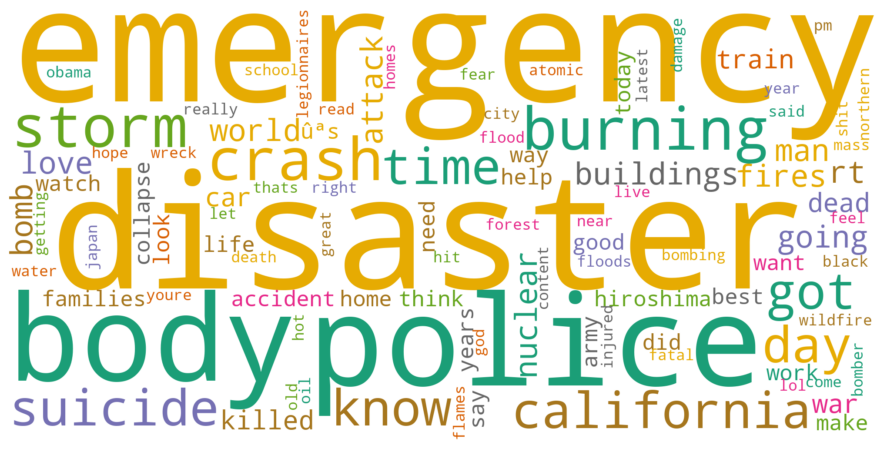

In [26]:
plt.figure(figsize = (16,8))

'''La instancia wc de WordCloud puede generar la nube a partir de la frecuencia
de las palabras. Pero para eso necesita un dictionario con las frecuencias.'''

wc.generate_from_frequencies(dictionary)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('', fontsize=20)

plt.show()

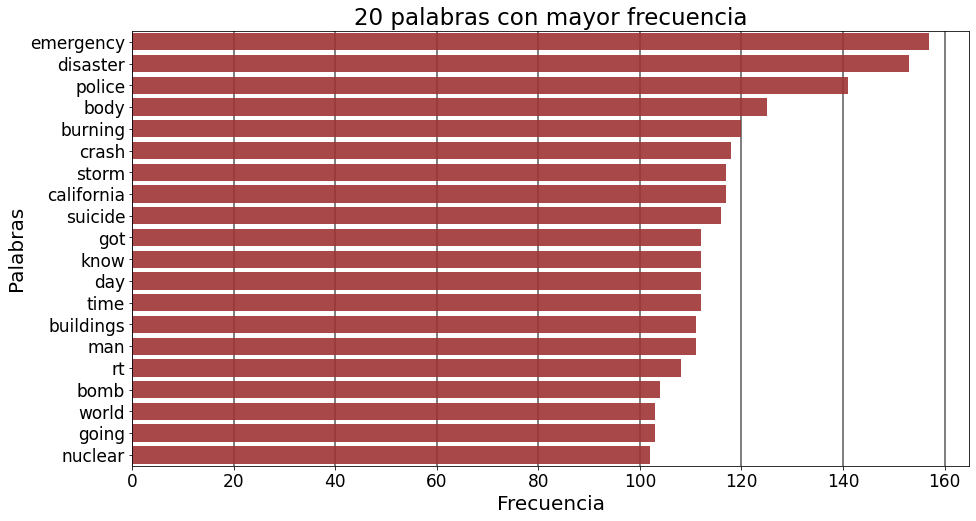

In [29]:
plt.figure(figsize=(15,8))

kw = words_freq_des.index[0:20]
counts = words_freq_des['count'].head(20)

plot = sns.barplot(x = counts, y = kw, orient = 'h', color='firebrick', alpha=0.9)
plt.title('20 palabras con mayor frecuencia', fontsize=23)
plt.xticks(fontsize=17, rotation=0)
plt.yticks(fontsize=17)
plt.xlabel('Frecuencia', fontsize=20)
plt.ylabel('Palabras', fontsize=20)

plt.rc('axes', axisbelow=True) # Manda a la grilla al fondo
plt.grid(axis='x', color='grey', linewidth=2)

plt.show()

## Análisis de frecuencia de palabras clave para todos los mensajes

In [30]:
df_cleaned['keyword'].nunique()

221

In [31]:
# Con esto se puede armar un diccionario.
df_cleaned['keyword'].value_counts()[0:20]

fatalities     45
armageddon     42
deluge         42
harm           41
sinking        41
body%20bags    41
damage         41
collided       40
fear           40
windstorm      40
siren          40
twister        40
evacuate       40
outbreak       40
wreckage       39
weapons        39
whirlwind      39
weapon         39
earthquake     39
sinkhole       39
Name: keyword, dtype: int64

Algunas keywords aparecen con `%20`. Veamos qué son.

In [32]:
df_cleaned.loc[df_cleaned['keyword'].str.contains('%20', na=False)]['keyword'].value_counts()

body%20bags              41
oil%20spill              38
burning%20buildings      37
nuclear%20reactor        36
dust%20storm             36
cliff%20fall             36
structural%20failure     35
suicide%20bomb           35
airplane%20accident      35
bridge%20collapse        35
emergency%20plan         35
buildings%20burning      35
heat%20wave              34
loud%20bang              34
natural%20disaster       34
nuclear%20disaster       34
fire%20truck             33
violent%20storm          33
suicide%20bombing        33
emergency%20services     33
blew%20up                33
body%20bag               33
body%20bagging           33
buildings%20on%20fire    33
mass%20murder            33
blown%20up               33
chemical%20emergency     33
mass%20murderer          32
forest%20fires           32
suicide%20bomber         31
wild%20fires             31
first%20responders       29
bush%20fires             25
war%20zone               24
forest%20fire            19
radiation%20emergenc

Todos estos casos parecen necesitar un guión `-` en lugar de `%20`.

In [33]:
df_cleaned.replace(to_replace={'%20':'-'}, inplace=True, regex=True)
# regex=True para reemplazar expresiones dentro del string.

Se genera el diccionario con las palabras corregidas.

In [34]:
# value_counts() devuelve una Serie ordenada de forma descendente.
# También ignora los NaN
dict_keywords = df_cleaned['keyword'].value_counts().to_dict()
dict_keywords

{'fatalities': 45,
 'deluge': 42,
 'armageddon': 42,
 'damage': 41,
 'harm': 41,
 'sinking': 41,
 'body-bags': 41,
 'outbreak': 40,
 'siren': 40,
 'collided': 40,
 'twister': 40,
 'fear': 40,
 'evacuate': 40,
 'windstorm': 40,
 'hellfire': 39,
 'weapon': 39,
 'famine': 39,
 'flames': 39,
 'weapons': 39,
 'sunk': 39,
 'explosion': 39,
 'derailment': 39,
 'wreckage': 39,
 'whirlwind': 39,
 'sinkhole': 39,
 'wrecked': 39,
 'earthquake': 39,
 'collision': 39,
 'thunder': 38,
 'bombed': 38,
 'oil-spill': 38,
 'deaths': 38,
 'blaze': 38,
 'hurricane': 38,
 'ambulance': 38,
 'upheaval': 38,
 'flooding': 38,
 'fire': 38,
 'typhoon': 38,
 'drowned': 38,
 'explode': 38,
 'derailed': 38,
 'injury': 38,
 'fatal': 38,
 'sandstorm': 37,
 'ruin': 37,
 'police': 37,
 'mudslide': 37,
 'fatality': 37,
 'wreck': 37,
 'debris': 37,
 'burning-buildings': 37,
 'crush': 37,
 'bioterror': 37,
 'emergency': 37,
 'curfew': 37,
 'blizzard': 37,
 'pandemonium': 37,
 'wounded': 37,
 'panic': 37,
 'destroy': 37,
 '

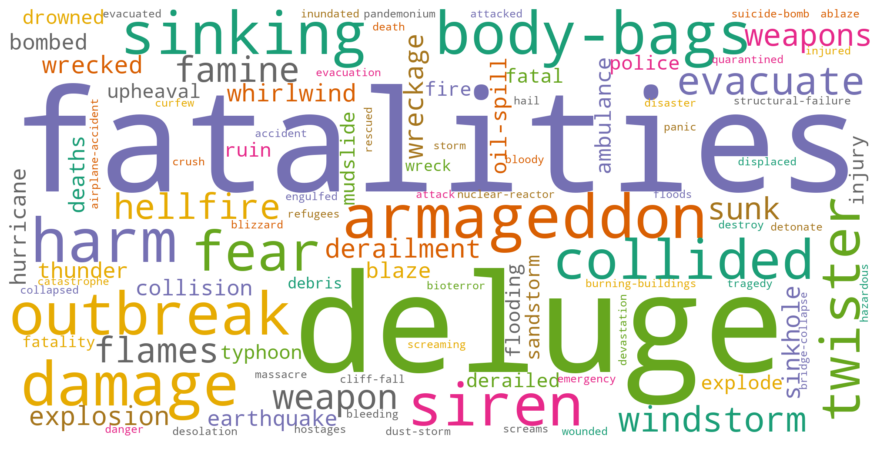

In [35]:
plt.figure(figsize = (16,8))

wc.generate_from_frequencies(dict_keywords)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('', fontsize=20)

plt.show()

In [36]:
keywords_freq = df_cleaned['keyword'].value_counts().head(20)
keywords_freq.head(5)

fatalities    45
deluge        42
armageddon    42
damage        41
harm          41
Name: keyword, dtype: int64

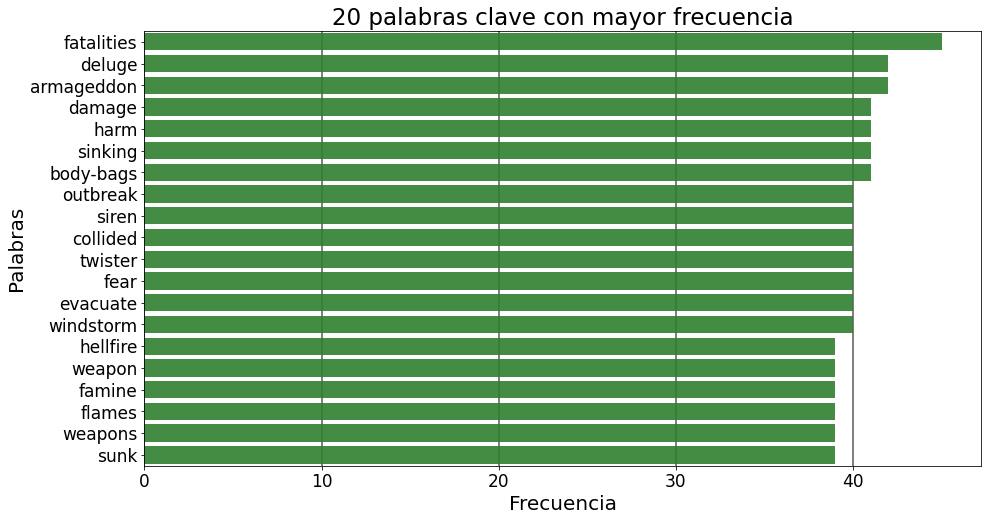

In [37]:
plt.figure(figsize=(15,8))

kw = keywords_freq.index
counts = keywords_freq.values

plot = sns.barplot(x = counts, y = kw, orient = 'h', color='forestgreen', alpha=0.9)
plt.title('20 palabras clave con mayor frecuencia', fontsize=23)
plt.xticks(fontsize=17, rotation=0)
plt.yticks(fontsize=17)
plt.xlabel('Frecuencia', fontsize=20)
plt.ylabel('Palabras', fontsize=20)

plt.grid(axis='x', color='grey', linewidth=2)

plt.rc('axes', axisbelow=True) # Manda a la grilla al fondo
plt.grid(axis='x', color='grey', linewidth=2, zorder=0)

plt.show()

## Análisis de frecuencia de palabras clave para casos de target=1

In [38]:
# Se usan los mensajes verdaderos.
df_target1 = df_cleaned.loc[df_cleaned['target'] == 1]
# Se combinan todos los mensajes.
text_raw = ' '.join(df_target1['text'])
# Se simplifican múltiples espacios a uno solo.
text_raw = re.sub('(\ ){2,7}', ' ',text_raw)
text_raw[0:1000]

'our deeds are the reason of this earthquake may allah forgive us all forest fire near la ronge sask canada all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected people receive wildfires evacuation orders in california just got sent this photo from ruby alaska as smoke from wildfires pours into a school rockyfire update california hwy closed in both directions due to lake county fire cafire wildfires flood disaster heavy rain causes flash flooding of streets in manitou colorado springs areas im on top of the hill and i can see a fire in the woods theres an emergency evacuation happening now in the building across the street im afraid that the tornado is coming to our area three people died from the heat wave so far haha south tampa is getting flooded hah wait a second i live in south tampa what am i gonna do what am i gonna do fvck flooding raining flooding florida tampabay tampa or days ive lost count flood i

In [39]:
#cv = CountVectorizer(stop_words=stop_words_new)
# Se usa [text_raw] porque requiere un iterable.
data_cv = cv.fit_transform([text_raw])
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm = data_dtm.T

data_dtm

,0
aa,1
aaaaaaallll,1
aaaaaand,1
aaarrrgghhh,1
aampb,1
...,...
ûóbbc,1
ûóher,1
ûókody,1
ûónegligence,1


In [40]:
# Se renombran las columnas.
data_dtm.rename(columns={'index':'term', 0:'count'}, inplace=True)
# Se toman las primeras 10 palabras con mayor frecuencia.
words_freq_des = data_dtm.sort_values(by='count', ascending=False)
words_freq_des.head(10)

,count
disaster,117
california,111
suicide,110
police,107
killed,93
hiroshima,88
storm,85
fires,84
crash,84
families,81


In [41]:
dict_target1 = words_freq_des['count'].to_dict()
dict_target1

{'disaster': 117,
 'california': 111,
 'suicide': 110,
 'police': 107,
 'killed': 93,
 'hiroshima': 88,
 'storm': 85,
 'fires': 84,
 'crash': 84,
 'families': 81,
 'train': 79,
 'buildings': 76,
 'emergency': 76,
 'bomb': 75,
 'nuclear': 71,
 'attack': 69,
 'wildfire': 69,
 'accident': 66,
 'bombing': 66,
 'burning': 64,
 'northern': 64,
 'dead': 63,
 'legionnaires': 62,
 'pm': 62,
 'bomber': 60,
 'war': 58,
 'car': 58,
 'homes': 58,
 'atomic': 56,
 'obama': 54,
 'fatal': 54,
 'years': 53,
 'collapse': 51,
 'forest': 50,
 'debris': 50,
 'watch': 50,
 'malaysia': 49,
 'japan': 49,
 'mass': 48,
 'man': 48,
 'water': 48,
 'latest': 48,
 'rt': 47,
 'near': 47,
 'today': 47,
 'severe': 47,
 'confirmed': 45,
 'earthquake': 45,
 'oil': 44,
 'home': 43,
 'floods': 42,
 'city': 42,
 'spill': 42,
 'army': 42,
 'warning': 42,
 'injured': 42,
 'world': 41,
 'migrants': 41,
 'derailment': 41,
 'outbreak': 40,
 'evacuation': 40,
 'wreckage': 40,
 'weather': 39,
 'thunderstorm': 39,
 'ûªs': 39,
 'sau

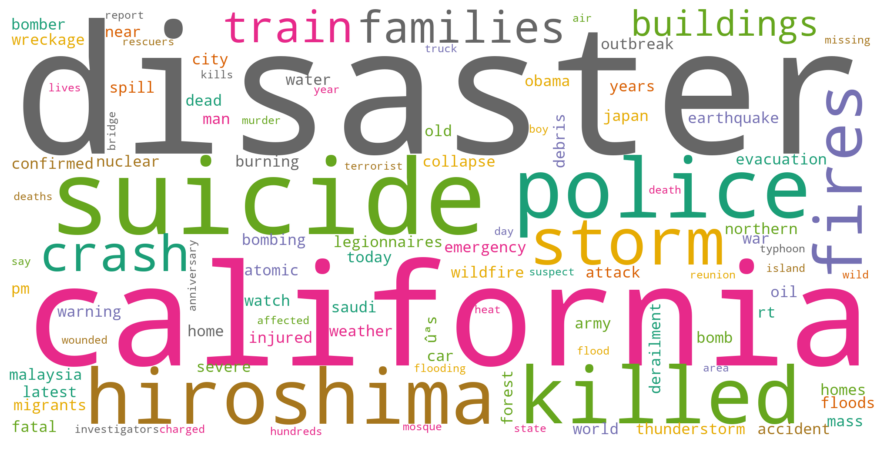

In [42]:
plt.figure(figsize = (16,8))

'''La instancia wc de WordCloud puede generar la nube a partir de la frecuencia
de las palabras. Pero para eso necesita un diccionario con las frecuencias.'''

wc.generate_from_frequencies(dict_target1)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('', fontsize=20)

plt.show()

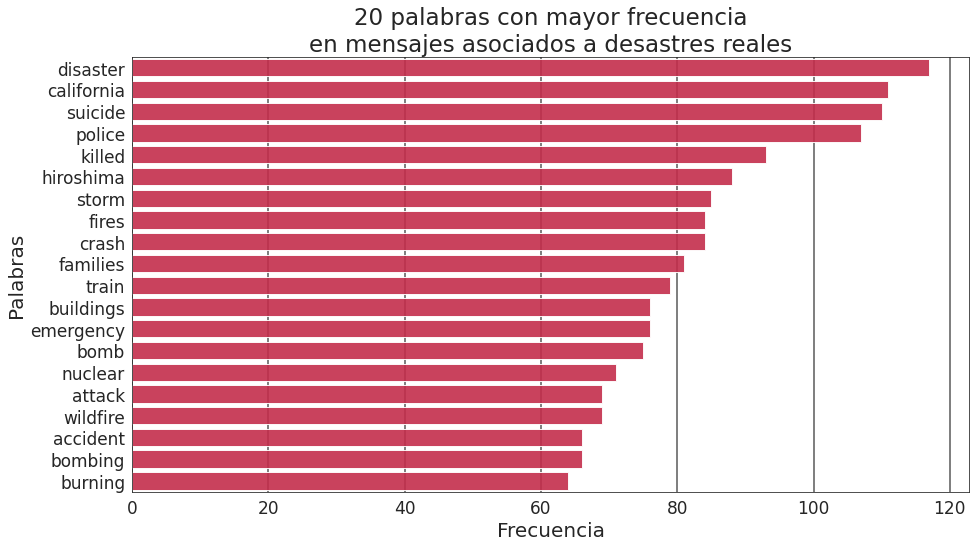

In [43]:
plt.figure(figsize=(15,8))
sns.set_style('white')

# Índice del DataFrame que cuenta frecuencias.
words_target1 = words_freq_des.index[0:20]
# Columna con el resultado de los conteos: Serie.
counts = words_freq_des['count'].head(20)

plot = sns.barplot(x = counts, y = words_target1, orient = 'h', color='crimson', alpha=0.9)
plt.title('20 palabras con mayor frecuencia\nen mensajes asociados a desastres reales', fontsize=23)
plt.xticks(fontsize=17, rotation=0)
plt.yticks(fontsize=17)
plt.xlabel('Frecuencia', fontsize=20)
plt.ylabel('Palabras', fontsize=20)

plt.rc('axes', axisbelow=True) # Manda a la grilla al fondo
plt.grid(axis='x', color='grey', linewidth=2, zorder=0)

plt.show()

Aquí los términos guardan una relación lógica con desastres ocacionales. Si se sacan de contexto algunas palabras no evocan a un suceso desastrozo, pero dentro de tal contexto todas pueden ser usadas para describir alguna desgracia.

---
---

## Análisis de frecuencia de palabras clave para casos de target=0

In [44]:
# Se usan los mensajes verdaderos.
df_target0 = df_cleaned.loc[df_cleaned['target'] == 0]
# Se combinan todos los mensajes.
text_raw = ' '.join(df_target0['text'])
# Se simplifican múltiples espacios a uno solo.
text_raw = re.sub('(\ ){2,7}', ' ',text_raw)
text_raw[0:1000]

'whats up man i love fruits summer is lovely my car is so fast what a goooooooaaaaaal this is ridiculous london is cool love skiing what a wonderful day looooool no wayi cant eat that shit was in nyc last week love my girlfriend cooool do you like pasta the end we always try to bring the heavy metal rt crying out for more set me ablaze on plus side look at the sky last night it was ablaze mufc theyve built so much hype around new acquisitions but i doubt they will set the epl ablaze this season ablaze for you lord d check these out nsfw on the outside youre ablaze and alive but youre dead inside had an awesome time visiting the cfc head office the ancop site and ablaze thanks to tita vida for taking care of us soooo pumped for ablaze i wanted to set chicago ablaze with my preaching but not my hotel i gained followers in the last week you know your stats and grow with building the perfect tracklist to life leave the streets ablaze check these out nsfw first night with retainers in its q

In [45]:
# Se usa [text_raw] porque requiere un iterable.
data_cv = cv.fit_transform([text_raw])
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm = data_dtm.T

data_dtm

,0
aa,1
aaaa,1
aampw,1
aannnnd,1
aar,1
...,...
ûïyou,1
ûò,18
ûòåêcnbc,1
ûó,16


In [46]:
# Se renombran las columnas.
data_dtm.rename(columns={'index':'term', 0:'count'}, inplace=True)
# Se toman las primeras 10 palabras con mayor frecuencia.
words_freq_des = data_dtm.sort_values(by='count', ascending=False)
words_freq_des.head(10)

,count
body,113
love,89
know,85
got,83
time,82
emergency,81
day,81
going,75
good,67
want,67


In [47]:
dict_target0 = words_freq_des['count'].to_dict()
dict_target0

{'body': 113,
 'love': 89,
 'know': 85,
 'got': 83,
 'time': 82,
 'emergency': 81,
 'day': 81,
 'going': 75,
 'good': 67,
 'want': 67,
 'think': 66,
 'man': 63,
 'world': 62,
 'lol': 61,
 'rt': 61,
 'life': 60,
 'youre': 58,
 'let': 58,
 'did': 58,
 'way': 56,
 'burning': 56,
 'need': 55,
 'make': 55,
 'really': 55,
 'work': 54,
 'best': 53,
 'say': 49,
 'read': 48,
 'help': 48,
 'wreck': 47,
 'great': 47,
 'right': 46,
 'ûªs': 46,
 'feel': 46,
 'black': 46,
 'content': 46,
 'hot': 45,
 'fear': 44,
 'look': 44,
 'bags': 43,
 'god': 43,
 'ass': 42,
 'today': 42,
 'cross': 42,
 'night': 40,
 'bag': 40,
 'fucking': 40,
 'come': 39,
 'hes': 38,
 'year': 38,
 'reddit': 38,
 'getting': 38,
 'check': 38,
 'bloody': 37,
 'liked': 37,
 'shit': 37,
 'ruin': 37,
 'screaming': 37,
 'ive': 36,
 'school': 36,
 'wrecked': 36,
 'explode': 36,
 'death': 36,
 'disaster': 36,
 'smoke': 36,
 'panic': 36,
 'coming': 35,
 'bad': 35,
 'buildings': 35,
 'face': 35,
 'thats': 35,
 'watch': 35,
 'harm': 35,
 'm

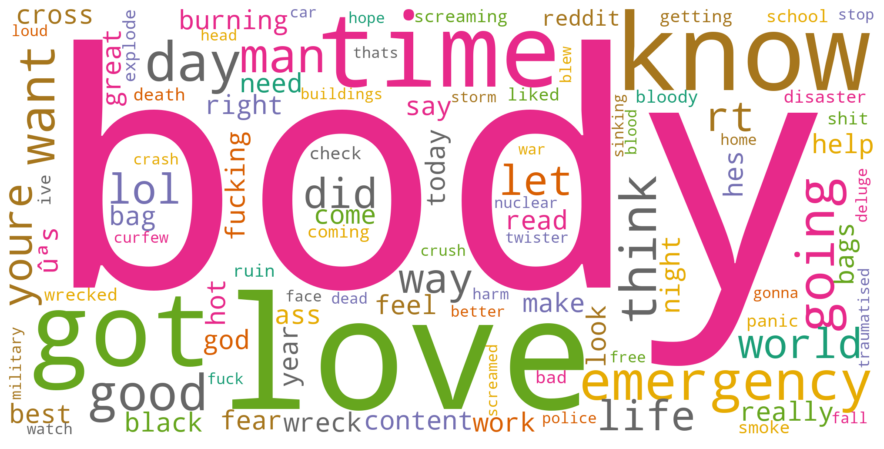

In [48]:
plt.figure(figsize = (16,8))

'''La instancia wc de WordCloud puede generar la nube a partir de la frecuencia
de las palabras. Pero para eso necesita un dictionario con las frecuencias.'''

wc.generate_from_frequencies(dict_target0)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('', fontsize=20)

plt.show()

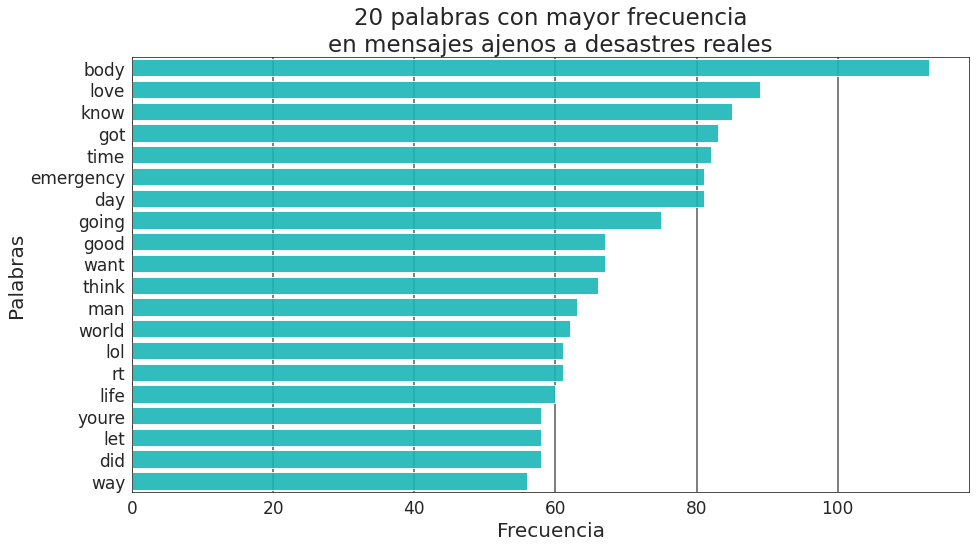

In [49]:
plt.figure(figsize=(15,8))

# Índice del DataFrame que cuenta frecuencias.
words_target0 = words_freq_des.index[0:20]
# Columna con el resultado de los conteos: Serie.
counts = words_freq_des['count'].head(20)

plot = sns.barplot(x = counts, y = words_target0, orient = 'h', color='darkturquoise', alpha=0.9)
plt.title('20 palabras con mayor frecuencia\nen mensajes ajenos a desastres reales', fontsize=23)
plt.xticks(fontsize=17, rotation=0)
plt.yticks(fontsize=17)
plt.xlabel('Frecuencia', fontsize=20)
plt.ylabel('Palabras', fontsize=20)

plt.rc('axes', axisbelow=True) # Manda a la grilla al fondo
plt.grid(axis='x', color='grey', linewidth=2, zorder=0)

plt.show()

Se puede apreciar que la palabra que denota una relación con un desastre es `emergency`. El resto de los términos resultan ambiguos o carecen de significado en lo relativo a desastres.

## Análisis de veracidad del mensaje según su longitud

In [50]:
# Se agrega un columna para la longitud del mensaje.
df['length'] = df['text'].str.len()
# Se informan las mediciones pedidas.
print('Características de longitud del texto del mensaje')
print('Máxima:', df['length'].max(), \
'\tMínina:', df['length'].min(), \
'\tMedia:', np.round(df['length'].mean(), decimals = 0))

Características de longitud del texto del mensaje
Máxima: 157 	Mínina: 7 	Media: 101.0


In [51]:
# Se arma nuevo DataFrame agrupando por longitud de mensaje
join = pd.DataFrame()
join['is_true'] = df.groupby('length')['target'].agg('sum')
join['total'] = df.groupby('length')['target'].agg('count')
join['portion_is_true'] = round(join['is_true'] / join['total'], 3)

# Se quitan los casos extremos.
clean = join.loc[join['portion_is_true'] < 1]
clean = clean.loc[clean['portion_is_true'] > 0]

# Se quitan los casos con pocas ocurrencias. Tienen que tener más de 10.
clean = clean.loc[clean['total'] > 10]
display(clean.nlargest(5, 'portion_is_true'))

print('Promedio de las cinco longitudes con mejor índice de veracidad:', \
clean.nlargest(5, 'portion_is_true').index.values.mean())
print('Mediana de las cinco longitudes con mejor índice de veracidad:', \
np.median(clean.nlargest(5, 'portion_is_true').index.values))

,is_true,total,portion_is_true
length,,,
136,277.0,401,0.691
91,60.0,88,0.682
135,119.0,191,0.623
116,40.0,67,0.597
137,125.0,210,0.595


Promedio de las cinco longitudes con mejor índice de veracidad: 123.0
Mediana de las cinco longitudes con mejor índice de veracidad: 135.0


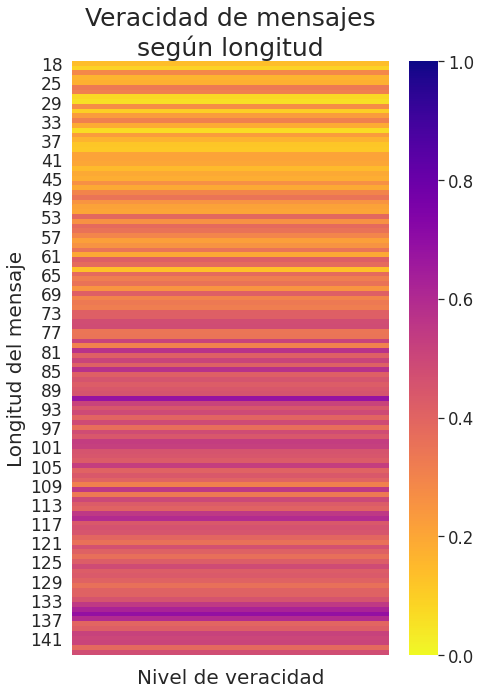

In [78]:
plt.figure(figsize = (7,10))
sns.set(font_scale = 1.5)
plot = sns.heatmap(clean[['portion_is_true']], \
                   vmin=0, vmax=1, \
                   cmap = 'plasma_r', \
                   cbar = True, \
                   xticklabels = [''])

plt.title('Veracidad de mensajes\nsegún longitud',fontsize = 25)
plot.set_xlabel('Nivel de veracidad', fontsize = 20)
plot.set_ylabel('Longitud del mensaje', fontsize = 20)
plt.xticks(fontsize = 17, rotation = 0, ha = 'center', va = 'top')
plt.yticks(fontsize = 17, rotation = 0)
plt.tight_layout() # Para que no recorte los títulos.
plt.show()

In [53]:
sns.set_style('white') # Para lavar el estilo de seaborn

## Generación de columnas

In [54]:
# Se agrega columna que indica si tiene 'location'.
df['with_location'] = df['location'].notna()
df['with_location'] = df['with_location'].astype('uint8')

# Se agrega columna que indica si tiene 'keyword'.
df['with_keyword'] = df['keyword'].notna()
df['with_keyword'] = df['with_keyword'].astype('uint8')

In [55]:
df.sample(10, random_state=42)

,id,keyword,location,text,target,length,with_location,with_keyword
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1,66,0,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0,119,0,1
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1,125,1,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0,114,0,1
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0,105,1,1
5559,7934,rainstorm,NaN,@Calum5SOS you look like you got caught in a r...,0,102,0,1
1765,2538,collision,NaN,my favorite lady came to our volunteer meeting...,1,123,0,1
1817,2611,crashed,NaN,@brianroemmele UX fail of EMV - people want to...,1,139,0,1
6810,9756,tragedy,"Los Angeles, CA",Can't find my ariana grande shirt this is a f...,0,60,1,1
4398,6254,hijacking,"Athens,Greece",The Murderous Story Of AmericaÛªs First Hijac...,1,73,1,1


Recordar que casi la totalidad de los casos del set de datos completa su `keyword`.

## Agrupando por lugar

In [56]:
df_group_by_location = pd.DataFrame()
df_group_by_location['count'] = df.groupby('location')['location'].agg('count')
df_group_by_location['length_mean'] = round(df.groupby('location')['length'].mean(), 2)
df_group_by_location['length_median'] = df.groupby('location')['length'].median()
df_group_by_location['proportion_true'] = round(df.groupby('location')['target'].sum() / df_group_by_location['count'], 2)
df_group_by_location['proportion_kw'] = round(df.groupby('location')['with_keyword'].sum() / df_group_by_location['count'], 2)
df_group_by_location.sample(5, random_state=42)

,count,length_mean,length_median,proportion_true,proportion_kw
location,,,,,
Born in Baltimore Living in PA,1,95.00,95.0,0.00,1.0
"Plano, Texas",1,87.00,87.0,0.00,1.0
"Columbia Heights, MN",1,130.00,130.0,0.00,1.0
"Johannesburg, South Africa",1,119.00,119.0,0.00,1.0
"Manhattan, NY",3,91.67,87.0,0.33,1.0


In [70]:
# Se eligen los lugares que registran más casos
df_group_by_location = df_group_by_location.nlargest(20, 'count')
df_group_by_location.sort_values(by='length_mean', ascending=True, inplace=True)
df_group_by_location

,count,length_mean,length_median,proportion_true,proportion_kw
location,,,,,
Everywhere,15,89.00,92.0,0.20,1.0
United States,50,100.02,100.0,0.54,1.0
India,24,102.92,107.5,0.83,1.0
Canada,29,105.86,112.0,0.45,1.0
California,17,106.18,114.0,0.41,1.0
"New York, NY",15,106.87,112.0,0.47,1.0
London,45,107.11,119.0,0.36,1.0
Worldwide,19,108.21,106.0,0.63,1.0
USA,104,108.51,106.0,0.64,1.0


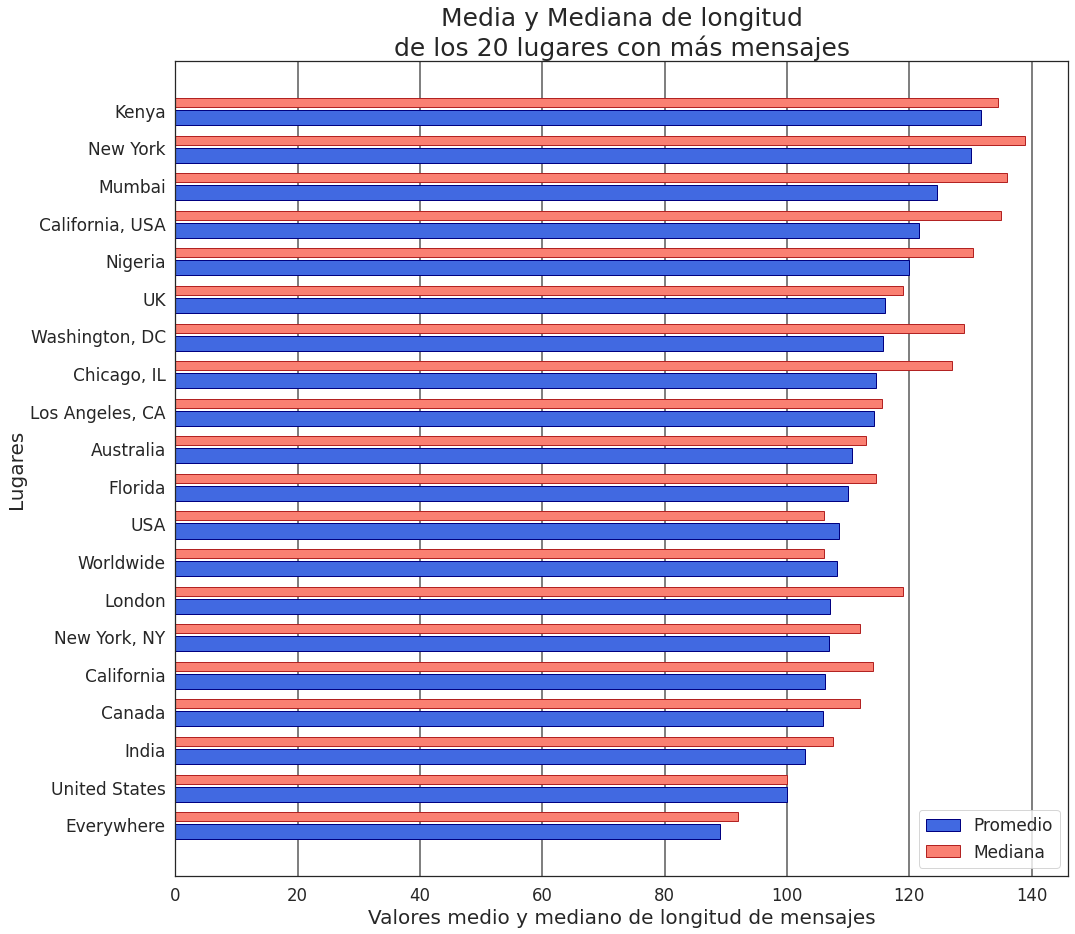

In [73]:
labels = df_group_by_location.index
mean = df_group_by_location['length_mean']
median = df_group_by_location['length_median']

y = np.arange(len(labels))  # ubicación de labels - orden
height = 0.4  # ancho de barras

fig, ax =plt.subplots(figsize=(16,15)) 
rects1 = ax.barh(y - height/2, mean, height, \
                 facecolor='royalblue', edgecolor='navy', linewidth=1, \
                 label='Promedio')
rects2 = ax.barh(y + height/2, median, height*0.6, \
                 facecolor='salmon', edgecolor='firebrick', linewidth=1, \
                 label='Mediana')

ax.set_xlabel('Valores medio y mediano de longitud de mensajes', fontsize=20)
ax.set_ylabel('Lugares', fontsize=20)
ax.set_title('Media y Mediana de longitud\nde los 20 lugares con más mensajes', fontsize=25)
ax.set_yticks(y)
ax.set_yticklabels(labels, fontsize=17, rotation = 0, ha = 'right')
ax.legend(fontsize=17)
ax.grid(False) # Desabilita la grilla inicial
ax.grid(axis='x', color='grey', linewidth=2)
ax.set_facecolor('white') # Da color al fondo

plt.show()

En general la mediana se encuentra por encima del promedio y cuando esto no ocurre, los valores son parecidos.

## Lugares con mayor proporción de mensajes asociados a desastres reales

In [68]:
df_group_by_location.sort_values(by='proportion_true', ascending=True, inplace=True)
df_group_by_location

,count,length_mean,length_median,proportion_true,proportion_kw
location,,,,,
Everywhere,15,89.00,92.0,0.20,1.0
Florida,14,110.00,114.5,0.21,1.0
New York,71,130.06,139.0,0.23,1.0
Kenya,20,131.75,134.5,0.25,1.0
"Los Angeles, CA",26,114.19,115.5,0.31,1.0
London,45,107.11,119.0,0.36,1.0
California,17,106.18,114.0,0.41,1.0
Canada,29,105.86,112.0,0.45,1.0
"New York, NY",15,106.87,112.0,0.47,1.0


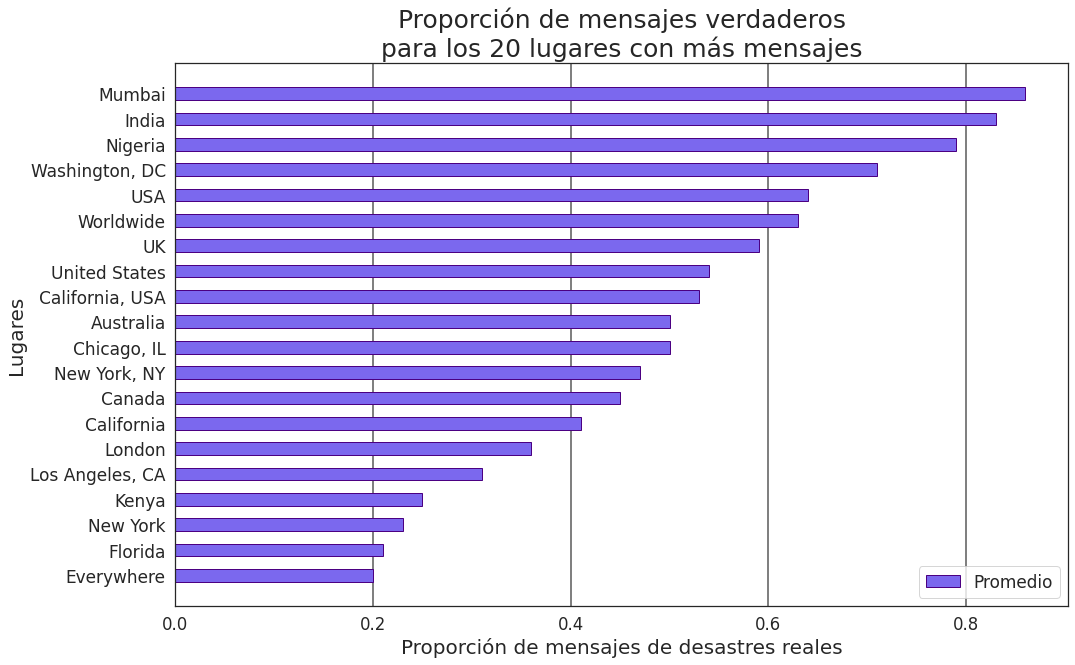

In [69]:
labels = df_group_by_location.index
prop_true = df_group_by_location['proportion_true']

y = np.arange(len(labels))  # ubicación de labels - orden
height = 0.5  # ancho de barras

fig, ax =plt.subplots(figsize=(16,10)) 
rects1 = ax.barh(y , prop_true, height, \
                 facecolor='mediumslateblue', edgecolor='indigo', linewidth=1, \
                 label='Promedio')

ax.set_xlabel('Proporción de mensajes de desastres reales', fontsize=20)
ax.set_ylabel('Lugares', fontsize=20)
ax.set_title('Proporción de mensajes verdaderos\npara los 20 lugares con más mensajes', fontsize=25)
ax.set_yticks(y)
ax.set_yticklabels(labels, fontsize=17, rotation = 0, ha = 'right')
ax.legend(fontsize=17)
ax.grid(False) # Desabilita la grilla inicial
ax.grid(axis='x', color='grey', linewidth=2)
ax.set_facecolor('white') # Da color al fondo

plt.show()

## Lugares con mayor proporción de mensajes con keyword

In [61]:
df_group_by_location.sort_values(by='proportion_kw', ascending=True, inplace=True)
df_group_by_location

,count,length_mean,length_median,proportion_true,proportion_kw
location,,,,,
Everywhere,15,89.00,92.0,0.20,1.0
Nigeria,28,120.00,130.5,0.79,1.0
"Washington, DC",21,115.71,129.0,0.71,1.0
USA,104,108.51,106.0,0.64,1.0
Worldwide,19,108.21,106.0,0.63,1.0
UK,27,116.04,119.0,0.59,1.0
United States,50,100.02,100.0,0.54,1.0
"California, USA",15,121.67,135.0,0.53,1.0
Australia,18,110.56,113.0,0.50,1.0


Un resultado interesante es que los lugares con más eventos registrados todos tienen `keyword`.

## Agrupando por lugar con mensajes de desastres reales

In [62]:
df_1 = df.loc[df['target'] == 1]
group_by_target1 = pd.DataFrame()
group_by_target1['count'] = df_1.groupby('location')['target'].agg('count')
group_by_target1['length_mean'] = round(df_1.groupby('location')['length'].mean(), 2)
group_by_target1['length_median'] = df_1.groupby('location')['length'].median()
group_by_target1['proportion_kw'] = round(df_1.groupby('location')['with_keyword'].sum() / group_by_target1['count'], 2)
group_by_target1.sample(10, random_state=42)

,count,length_mean,length_median,proportion_kw
location,,,,
REPUBLICA DOMINICANA,2,137.0,137.0,1.0
Kansas,1,143.0,143.0,1.0
NYC-LA-MIAMI,1,140.0,140.0,1.0
Pedophile hunting ground,5,134.8,134.0,1.0
Chicago IL,1,49.0,49.0,1.0
"Tucson, AZ",1,136.0,136.0,1.0
Based in CA - Serve Nationwide,1,101.0,101.0,1.0
"DC, frequently NYC/San Diego",1,44.0,44.0,1.0
"Knoxville, TN",1,136.0,136.0,1.0


In [63]:
# Se eligen los lugares que registran más casos
group_by_target1 = group_by_target1.nlargest(20, 'count')
group_by_target1.sort_values(by='length_mean', ascending=True, inplace=True)
group_by_target1

,count,length_mean,length_median,proportion_kw
location,,,,
India,20,100.90,99.0,1.0
Worldwide,12,100.92,98.0,1.0
United States,27,101.96,105.0,1.0
USA,67,102.76,91.0,1.0
Australia,9,103.78,101.0,1.0
California,7,105.29,101.0,1.0
Earth,8,108.75,110.5,1.0
Canada,13,109.08,112.0,1.0
Indonesia,8,110.12,115.5,1.0


Como antes se ve que los lugares con mayor cantidad de mensajes, que realmente están asociados a desastres, todos tienen `keyword`.

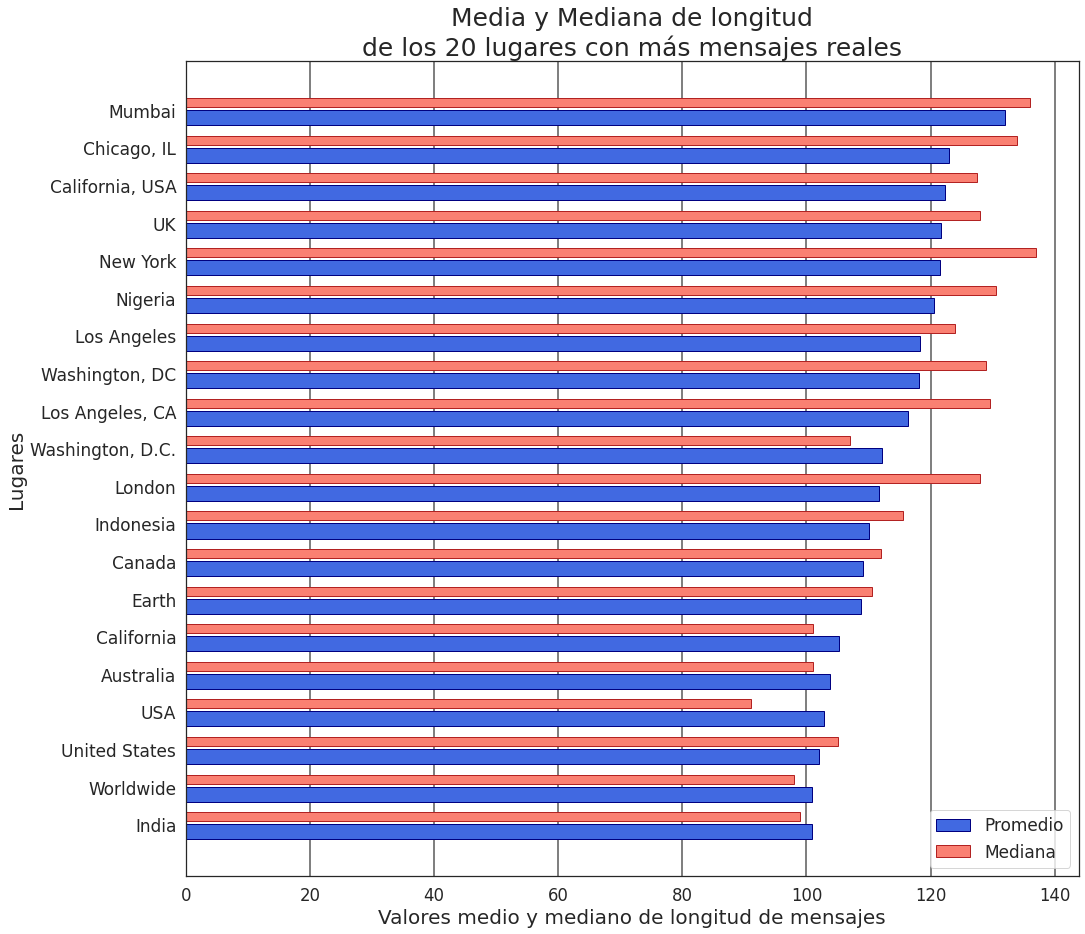

In [66]:
labels = group_by_target1.index
mean = group_by_target1['length_mean']
median = group_by_target1['length_median']

y = np.arange(len(labels))  # ubicación de labels - orden
height = 0.4  # ancho de barras

fig, ax =plt.subplots(figsize=(16,15)) 
rects1 = ax.barh(y - height/2, mean, height, \
                 facecolor='royalblue', edgecolor='navy', linewidth=1, \
                 label='Promedio')
rects2 = ax.barh(y + height/2, median, height*0.6, \
                 facecolor='salmon', edgecolor='firebrick', linewidth=1, \
                 label='Mediana')

ax.set_xlabel('Valores medio y mediano de longitud de mensajes', fontsize=20)
ax.set_ylabel('Lugares', fontsize=20)
ax.set_title('Media y Mediana de longitud\nde los 20 lugares con más mensajes reales', fontsize=25)
ax.set_yticks(y)
ax.set_yticklabels(labels, fontsize=17, rotation = 0, ha = 'right')
ax.legend(fontsize=17)
ax.grid(False) # Desabilita la grilla inicial
ax.grid(axis='x', color='grey', linewidth=2)
ax.set_facecolor('white') # Da color al fondo

plt.show()